<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/ml02_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 모듈 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# scikit-lean(sklearn) 패키지(모듈)의 neighbors 서브 모듈에 정의된 KNeigborsClassifier 클래스를 import
from sklearn.neighbors import KNeighborsClassifier

# 데이터 준비

생선의 품종(어종)과 생선의 특성들(무게, 길이, 대각선 길이, 높이, 너비) 데이터 셋

In [ ]:
# 파일이 저장된 Github 주소
fish_scv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
# CSV 파일을 읽고 DataFrame을 생성
fish = pd.read_csv(fish_scv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 탐색

EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

In [ ]:
# 숫자 타입 변수(DF-colum)들의 기술 통계량
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# 카테고리 타입 변수의 빈도수 
species_cnt = fish['Species'].value_counts()
species_cnt

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

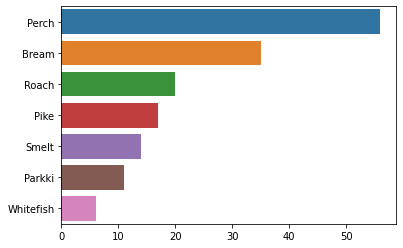

In [ ]:
sns.barplot(x=species_cnt.values, y=species_cnt.index)
plt.show()

숫자 타입 변수들의 히스토그램

5개의 subplot을 생성하고, 각각의 변수들의 히스토그램을 그림.

In [ ]:
weight_count = fish['Weight'].value_counts()

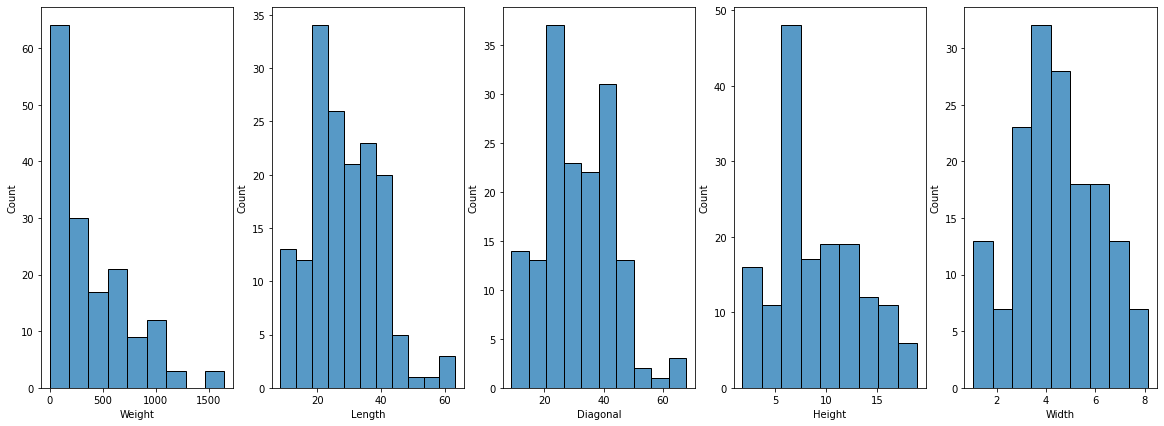

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 7))

variables = fish.columns[1:] # 1번부터 끝까지 Weight, ... Width 컬럼 이름들의 배열
for i, var in enumerate(variables): # enumerate-> 배열에 있는 index, value를 같이 꺼내줌
    sns.histplot(x=var, data=fish, ax=ax[i])
    # print(i, var)


plt.show()

두 변수들 간의 상관 관계 시각화

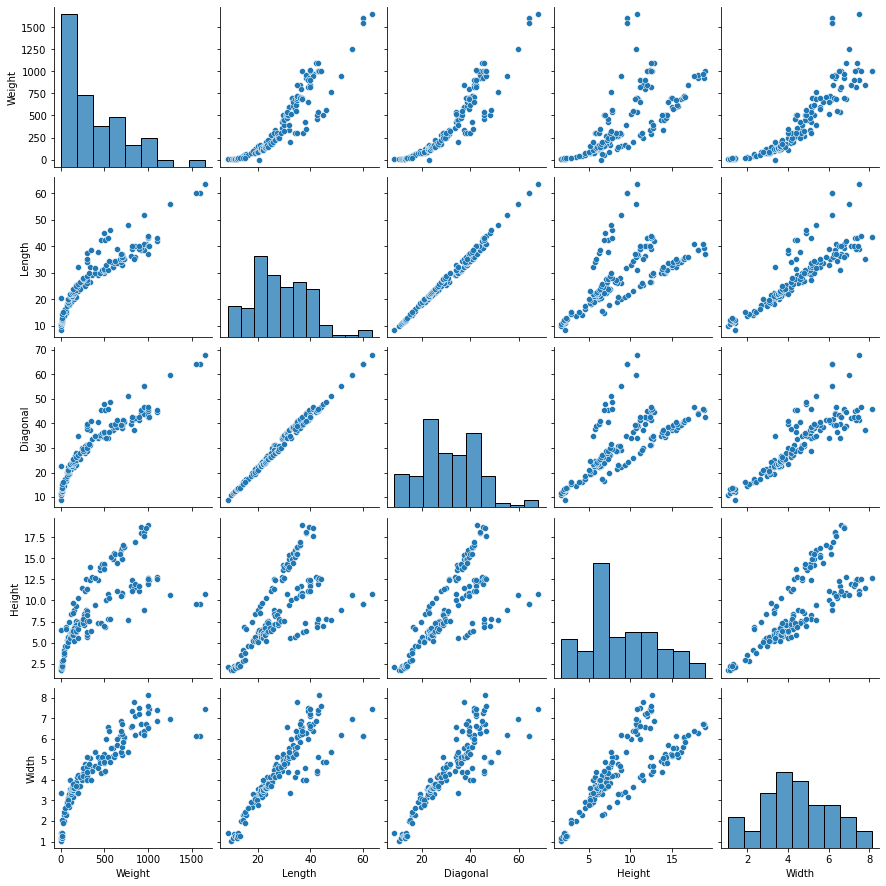

In [ ]:
sns.pairplot(data=fish)
plt.show()

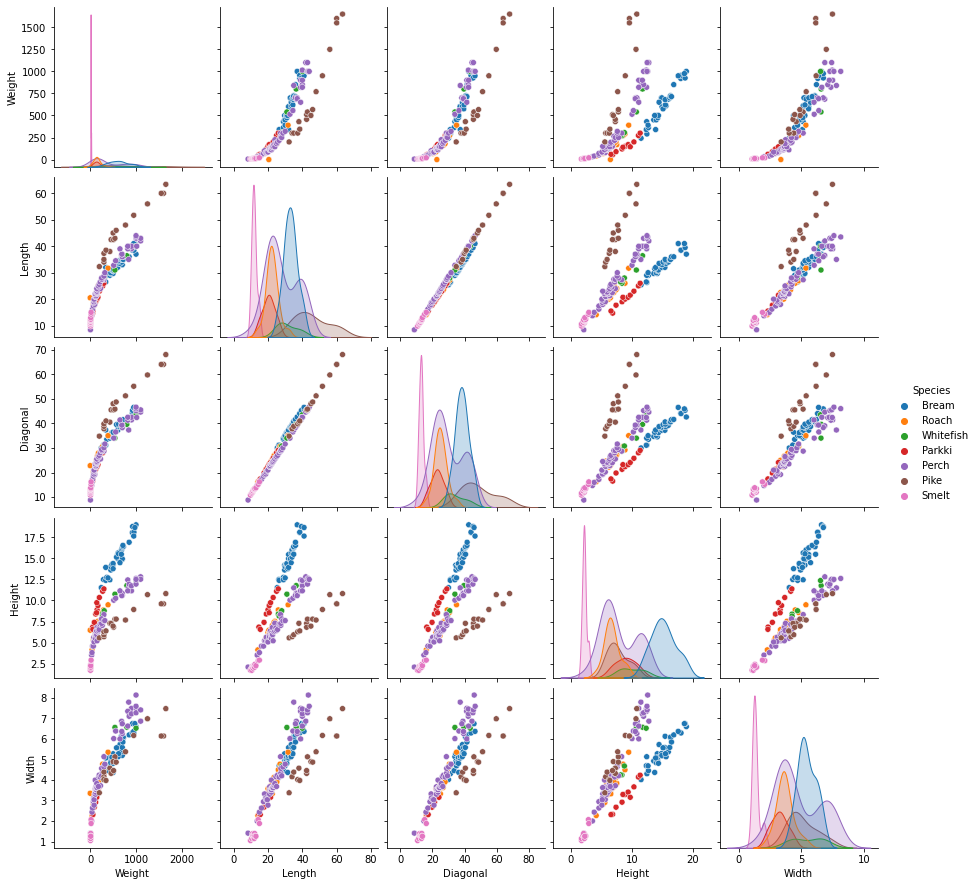

In [ ]:
sns.pairplot(data=fish, hue='Species')
plt.show()

# 2개 어종 분류 문제

* Bream(도미), Smelt(빙어) 어종 선택 - 2진 분류(binary classfication) 문제
* Weight(무게), Length(길이) 2개 변수만 선택 - 독립 변수(특성) 2개

In [ ]:
pd.options.display.max_rows = 8 # DataFrame, Series를 콘솔에 출력할 때 최대 행의 개수를 지정.

In [ ]:
# DataFrame에서 Bream(도미)와 smelt(빙어)를 선택
fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')] # row 선택방법

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
...,...,...,...,...,...,...
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
fish[fish['Species'].isin(['Bream', 'Smelt'])]

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
...,...,...,...,...,...,...
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
# Bream과 Smelt의 Weight, Lenghth 특성(컬럼, 변수)들만 선택
fish[fish['Species'].isin(['Bream', 'Smelt'])][['Weight', 'Length']] # [['Weight', 'Length']] - 뒷쪽은 열

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
...,...,...
155,13.4,12.4
156,12.2,13.0
157,19.7,14.3
158,19.9,15.0


In [ ]:
fish.loc[0:5, 'Weight':'Length']

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7


In [ ]:
# df.loc[row 선택 기준, column 선택 기준]
df = fish.loc[fish['Species'].isin(['Bream','Smelt']), ['Weight','Length','Species']]

In [ ]:
df # Bream(도미)와 Smelt(빙어)의 Weight(무게)와 Length(길이)만 선택한 DataFrame

,Weight,Length,Species
0,242.0,25.4,Bream
1,290.0,26.3,Bream
2,340.0,26.5,Bream
3,363.0,29.0,Bream
...,...,...,...
155,13.4,12.4,Smelt
156,12.2,13.0,Smelt
157,19.7,14.3,Smelt
158,19.9,15.0,Smelt


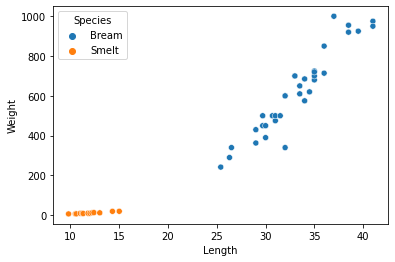

In [ ]:
# df 시각화: Weight ~ Length 산점도. 컬러를 어종에 따라서 다르게 표현.
sns.scatterplot(x='Length', y='Weight', data=df, hue='Species')
plt.show()

## 특성(feature)과 타겟(target, label) 분리

In [ ]:
# 특성: 물고기의 특성(무게, 길이)
features = df[['Weight', 'Length']].values # 특성들로 이루어진 2차원 배열(ndarray)

In [ ]:
features[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [69]:
# 타겟: 예측하려는 값(물고기의 종류)
target = df['Species'].values # 타겟값들을 저장한 1차원 배열

In [70]:
target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [72]:
print(features.shape) #> (샘플 개수, 특성 개수)
print(target.shape) #> (샘플 개수,) shape의 1차원 배열

(49, 2)
(49,)


# 머신 러닝 모델(알고리즘) 선택, 훈련(학습)

KNN(K-Nearest Neighbors, K-최근접 이웃) classfier(분류기)

In [71]:
# 머신러닝 모델 선택
knn_clf = KNeighborsClassifier() # KNeighborsClassifier 클래스 생성자 호출

In [73]:
# 머신 러닝 모델 훈련(training) - 모델을 데이터에 적합(fit)시킨다.
knn_clf.fit(X=features, y=target) # X 대문자 배열 튜플 features 문제지 target 정답지
# features 위에처럼 무게와 길이를 줌

KNeighborsClassifier()

# 모델 평가(evaluation)

* 모델을 훈련시킨 후, 훈련 데이터들을 얼마나 잘 예측(분류)하는 지를 평가
    * 훈련 데이터의 예측값들을 계산
    * 훈련 데이터의 예측값들과 실젯값(레이블, 타겟)들의 비교 - 정확도 계산

In [75]:
# 훈련 데이터의 에측(prediction) 값 계산
train_pred = knn_clf.predict(X=features) # 물고기의 무게와 길이를 주고 predict 예측

In [76]:
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [78]:
# 정확도 계산: 예측값(predictions)과 실젯값(target) 비교
np.mean(train_pred == target) # True=1, False=0으로 평균 계산.

1.0

가상의 2마리 물고기 데이터를 만들고 예측.

In [82]:
# [600, 30cm], [50, 14cm] - 가상의 물고기 2마리
test_features = np.array([[600, 30],
                          [50, 14]])

In [84]:
test_features

array([[600,  30],
       [ 50,  14]])

In [86]:
# 가상의 물고기 2마리의 예측 값
test_pred = knn_clf.predict(X=test_features)

In [87]:
test_pred

#[600, 30cm], [50, 14cm] 예측값을 가지고
#array(['Bream', 'Smelt'], dtype=object)  Bream,Smelt로 예측

array(['Bream', 'Smelt'], dtype=object)

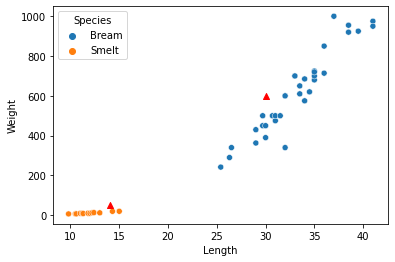

In [89]:
# 훈련 데이터와 가상의 데이터를 함께 시각화: Weight ~ Length
sns.scatterplot(data=df, x='Length', y='Weight', hue='Species') # 훈련데이터 시각화
plt.scatter(x=test_features[:, 1], y=test_features[:, 0], color='red', marker='^') # 가상의 물고기 2마리

plt.show()